In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats 
# for multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import and explore data

In [108]:
#read the file
df = pd.read_csv('..\Regression notebooks\Toyota Corolla.csv')

df.shape
df.info()
df.describe()
df.head(5)

(1436, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


1. We have 1436 data rows.
2. 10 feature variables. 1 categorical , 9 interval
3. No missing values


* Price - Offer Price in EUROs 
* Age - age in years
* KM - Accumulated Kilometers on odometer
* FuelType - Fuel Type (Petrol, Diesel, CNG)
* HP - horse power
* MetColor - Metallic Color? (Yes=1, No=0)
* Automatic - Automatic ( (Yes=1, No=0))
* CC - Cylinder Volume in cubic centimeters
* Doors - No. of doors
* Weight - Weight in kgs

**Fuel type, MetColor, Automatic, Doors seem to be nominal features. Price is the dependent variable**

# EDA

In [109]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [110]:
'''pd.crosstab(index = df.FuelType, columns = 'count')
pd.crosstab(index = df.MetColor, columns = 'count')
pd.crosstab(index = df.Automatic, columns = 'count')
pd.crosstab(index = df.Doors, columns = 'count')
'''

"pd.crosstab(index = df.FuelType, columns = 'count')\npd.crosstab(index = df.MetColor, columns = 'count')\npd.crosstab(index = df.Automatic, columns = 'count')\npd.crosstab(index = df.Doors, columns = 'count')\n"

In [111]:
sns.set_palette("viridis")
sns.set_style('dark')

Text(0, 0.5, 'Fuel Type')

Text(0, 0.5, 'Metallic Color')

Text(0, 0.5, 'Automatic')

Text(0, 0.5, 'Doors')

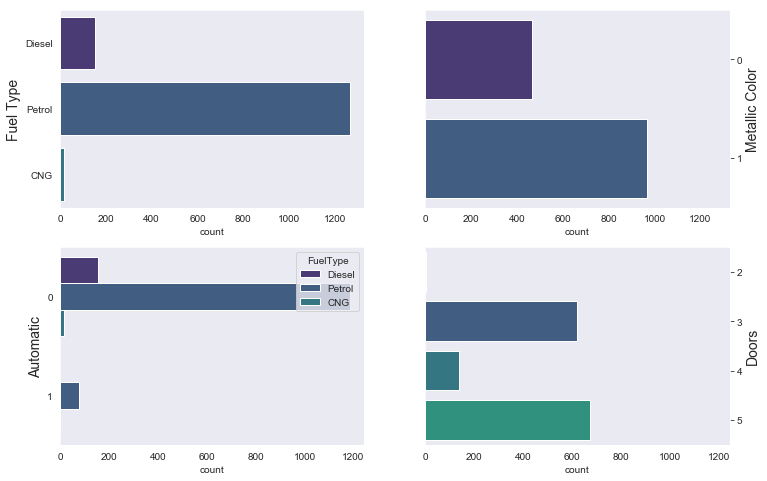

In [112]:
fig, ax = plt.subplots(2,2, figsize = (12,8), sharex = 'row')
#plt.subplots(2, 2, sharey='row')
sns.countplot(y = 'FuelType', data = df, ax = ax[0,0])
sns.countplot(y = 'MetColor', data = df, ax = ax[0,1])
sns.countplot(y = 'Automatic', data = df, hue = 'FuelType', ax = ax[1,0])
sns.countplot(y = 'Doors', data = df, ax = ax[1,1])

ax[0,0].set_ylabel('Fuel Type', fontsize=14)
ax[0,1].set_ylabel('Metallic Color', fontsize=14)
ax[1,0].set_ylabel('Automatic', fontsize=14)
ax[1,1].set_ylabel('Doors', fontsize=14)

ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()


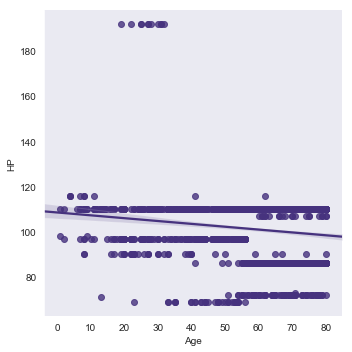

In [113]:
sns.lmplot(x = 'Age', y= 'HP', data = df)

I thought as age increased the HP would decrease as older cars would have lower HP. Should I check age with KMs to get more insight

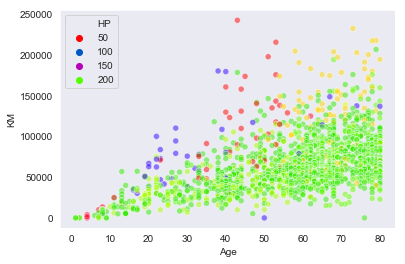

In [114]:
sns.scatterplot(x = df.Age, y= df.KM, hue = df.HP, palette = 'prism', alpha = 0.5)

As age increases, HP increases. They are highly correlated. So I wont use both in model buiding. Age/HP is in negative correlation with price. Is a feature with neg correlation included in model building??????????

Text(0.5, 0, 'Doors')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Doors')

Text(0, 0.5, 'Price')

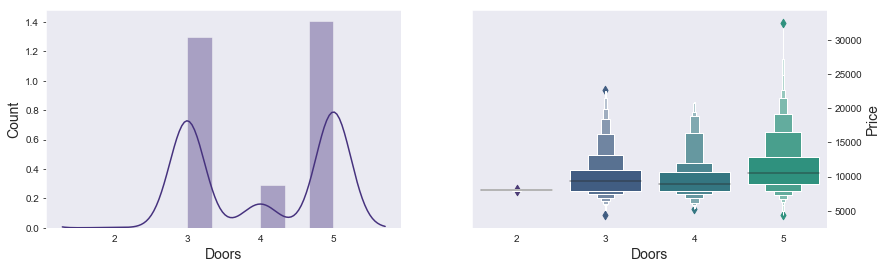

In [115]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Doors'], ax = axes[0])
axes[0].set_xlabel('Doors', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'Doors', y = 'Price', data = df, ax = axes[1])
axes[1].set_xlabel('Doors', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

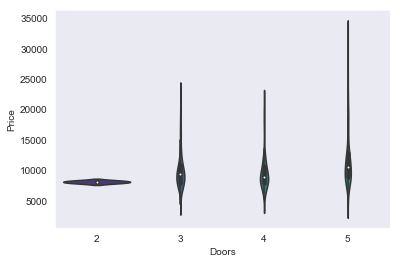

In [116]:
sns.violinplot(x = 'Doors', y = 'Price', data = df)

# Models

In [117]:
df.corr().iloc[0].sort_values()

Age         -0.876590
KM          -0.569960
Automatic    0.033081
MetColor     0.108905
CC           0.165067
Doors        0.185326
HP           0.314990
Weight       0.581198
Price        1.000000
Name: Price, dtype: float64

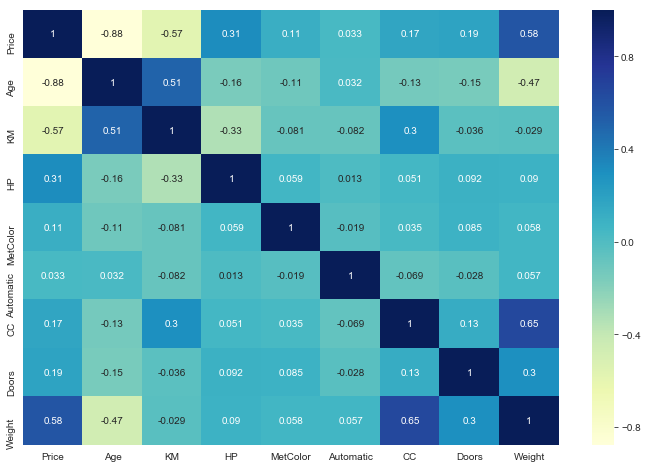

In [118]:
f, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(data = df.corr(), annot = True, cmap="YlGnBu")

*Did Toyota stop producing CNG models??* Google this

In [119]:
df.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

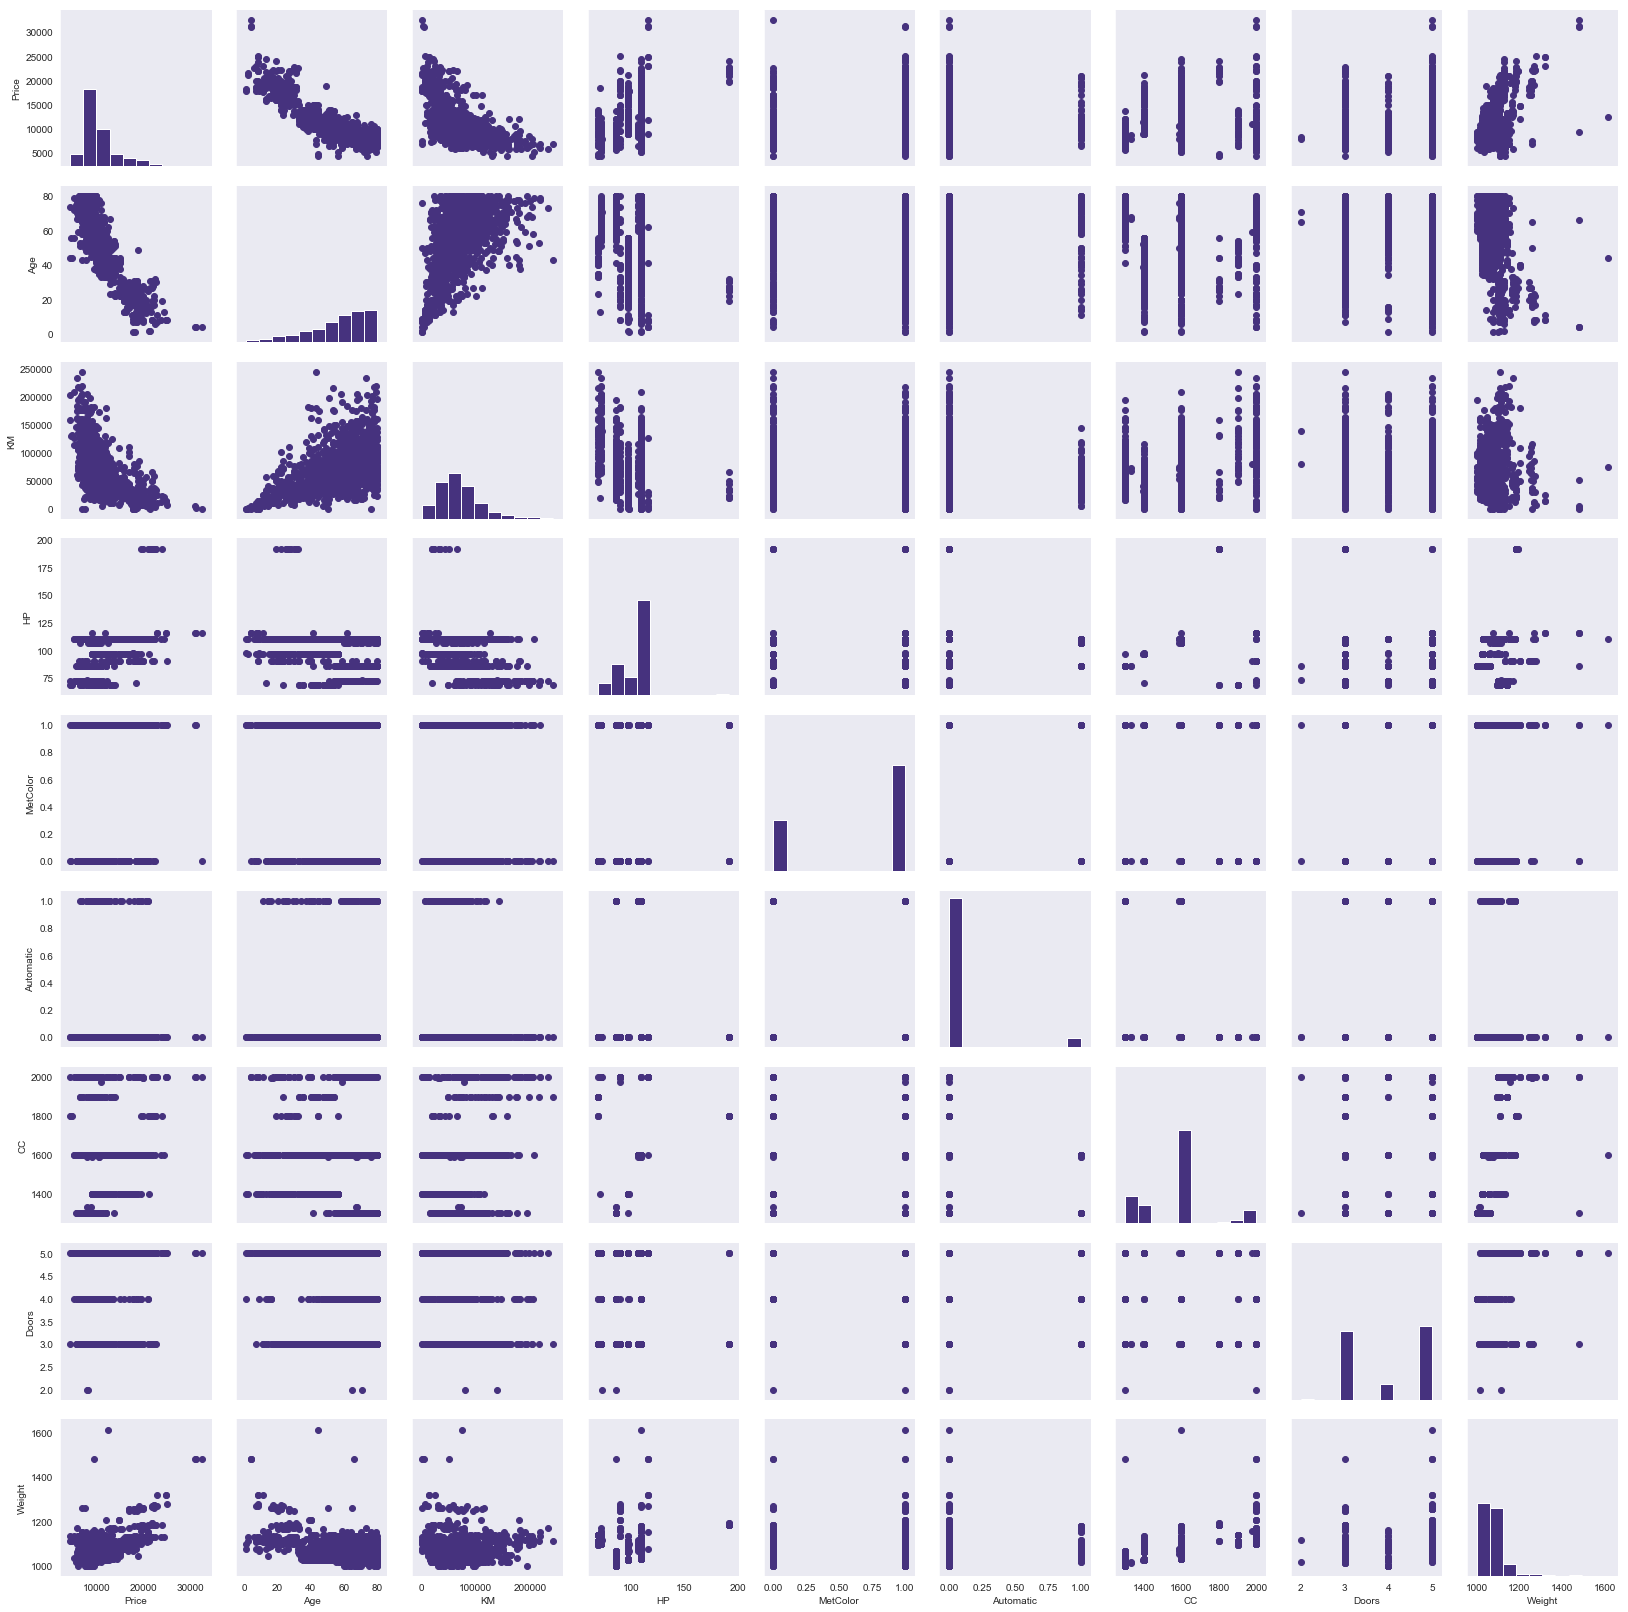

In [120]:
g = sns.PairGrid(data =df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [121]:
df = pd.get_dummies(df)
df.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol'],
      dtype='object')

In [122]:
model = smf.ols('Price ~ Age + KM + HP + MetColor + Automatic + CC + Doors + Weight + \
                FuelType_CNG + FuelType_Diesel + FuelType_Petrol', data = df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     948.0
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:55:38   Log-Likelihood:                -12346.
No. Observations:                1436   AIC:                         2.471e+04
Df Residuals:                    1425   BIC:                         2.477e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1723.3328    996.481     -1.729      0.084   -3678.059     231.394
Age              -122.0145      2.602    -46.889      0.000    -127.119    -116.910
KM                 -0.0162      0.001    -12.347      0.000      -0.019      -0.014
HP                 60.8133      5.756     10.565      0.000      49.522      72.104
MetColor           57.1598     74.939      0.763      0.446     -89.843     204.162
Automatic         330.2509    157.096      2.102      0.036      22.087     638.414
CC                 -4.1744      0.545     -7.656      0.000      -5.244      -3.105
Doors              -7.7763     40.064     -0.194      0.846     -86.368      70.815
Weight             20.0094      1.203     16.629      0.000      17.649      22.370
FuelType_CNG    -2078.0286    375.956     -5.527      0.000   -2815.516   -1340.542
FuelType_Diesel  1312.0480    558.455      2.349      0.019     216.566    2407.530
FuelType_Petrol  -957.3522    262.075     -3.653      0.000   -1471.447    -443.257
==============================================================================
Omnibus:                      275.198   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2826.189
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       9.776   Cond. No.                     4.64e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In report above, should the categorical features be coded as categorial before this report be generated? (Look at Fuel type)

Should negative corr featrures be used in model building?



In [123]:
(df[['Weight','HP','CC','Doors']]).corr()

,Weight,HP,CC,Doors
Weight,1.000000,0.089614,0.651450,0.302618
HP,0.089614,1.000000,0.050884,0.092424
CC,0.651450,0.050884,1.000000,0.126768
Doors,0.302618,0.092424,0.126768,1.000000


Size of engine is CC. As size of engine increase, weight wull increase too.

## Splitting data

Get dummies was used already.....

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FT = le.fit_transform(df.FuelType)
df.FuelType = FT

df.describe()

In [125]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df.drop('Price' ,axis = 1), df.Price)

Let me first check if the categorical feature values are distributed in test and train sets.

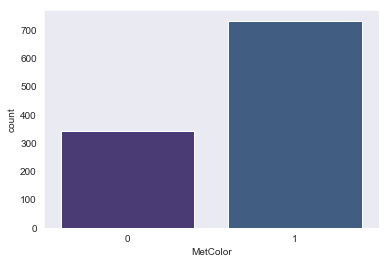

In [128]:
sns.countplot(train_X.MetColor)
#sns.countplot(test_X.MetColor)

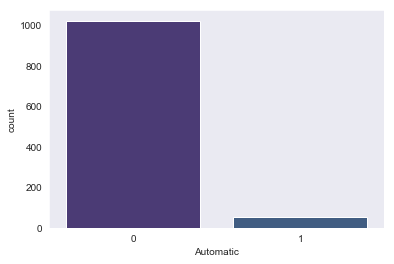

In [129]:
sns.countplot(train_X.Automatic)
#sns.countplot(test_X.Automatic)

In [157]:
comparison = pd.DataFrame(columns = ['Model', 'Train R2', 'Test R2'])

## Simple Linear Regression

In [159]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(train_X, train_y)
comparison.loc[-1] = ['Simple Linear Regression', lr_model.score(train_X, train_y), lr_model.score(test_X, test_y) ]
print(comparison.loc[-1])

Model       Simple Linear Regression
Train R2                    0.881242
Test R2                     0.792478
Name: -1, dtype: object


Text(0.5, 0, 'Actual test price')

Text(0, 0.5, 'Residuals')

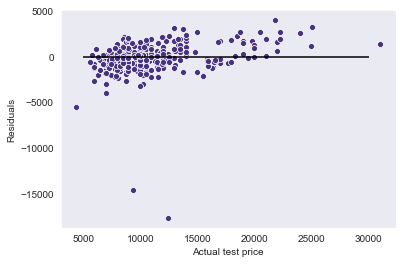

In [131]:
pred_y = lr_model.predict(test_X)
lr_model_residuals = test_y - pred_y

sns.scatterplot(x = test_y, y = lr_model_residuals)
plt.xlabel('Actual test price')
plt.ylabel('Residuals')
plt.hlines(y = 0, xmin = 5000, xmax = 30000, color = 'black')

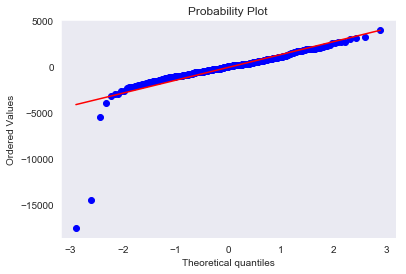

In [132]:
qqplot = stats.probplot(lr_model_residuals, dist = 'norm', plot = plt)

Since CC and weight correlate. Eliminating CC, MetColor, Doors.

In [133]:
lr_model1 = LinearRegression().fit(train_X.drop(['MetColor', 'CC','Doors'], axis = 1), train_y)
lr_model1.score(train_X.drop(['MetColor', 'CC','Doors'], axis = 1), train_y)

0.8764880922725506

## Polynomial Regression

In [134]:
from sklearn.preprocessing import PolynomialFeatures

In [162]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)
X = poly.fit_transform(train_X)

poly_model = LinearRegression().fit(X, train_y)

comparison.loc[-1] = ['Polynomial Regression degree 2', \
                      poly_model.score(X, train_y), poly_model.score(poly.fit_transform(test_X), test_y) ]
print(comparison.loc[-1])

Model       Polynomial Regression degree 2
Train R2                          0.919249
Test R2                           0.782205
Name: -1, dtype: object


Text(0.5, 0, 'Actual test price')

Text(0, 0.5, 'Residuals')

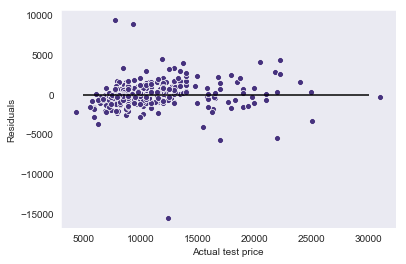

In [136]:
poly_predict = poly_model.predict(poly.fit_transform(test_X))
poly_residuals = test_y - poly_predict

sns.scatterplot(x = test_y, y = poly_residuals)
plt.xlabel('Actual test price')
plt.ylabel('Residuals')
plt.hlines(y = 0, xmin = 5000, xmax = 30000, color = 'black')

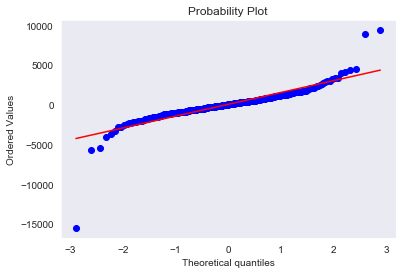

In [137]:
qqplot = stats.probplot(poly_residuals, dist = 'norm', plot = plt)

## Random Forest Regressor

In [163]:
from sklearn.ensemble import RandomForestRegressor

RFR_model = RandomForestRegressor(n_estimators=80, criterion='mse').fit(train_X, train_y)

comparison.loc[-1] = ['Random Forest', RFR_model.score(train_X, train_y), RFR_model.score(test_X, test_y)]
print(comparison.loc[-1])

Train Score : 0.987 
Test Score  : 0.912 
Model       Random Forest
Train R2          0.98746
Test R2          0.911539
Name: -1, dtype: object


Text(0.5, 0, 'Actual test price')

Text(0, 0.5, 'Residuals')

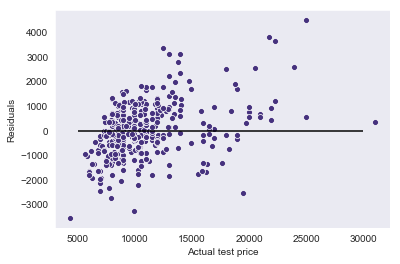

In [139]:
RFR_predict = RFR_model.predict(test_X)
RFR_residuals = test_y - RFR_predict

sns.scatterplot(x = test_y, y = RFR_residuals)
plt.xlabel('Actual test price')
plt.ylabel('Residuals')
plt.hlines(y = 0, xmin = 5000, xmax = 30000, color = 'black')

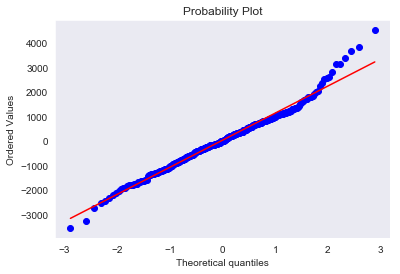

In [140]:
qqplot = stats.probplot(RFR_residuals, dist = 'norm', plot = plt)

In [164]:
lr_model_residuals.var()
poly_residuals.var()
RFR_residuals.var()

2856955.304150341

2797625.935238187

1229364.5879750717

Given the variance of residuals and the R2 values, Random Forest model would be selected